In [4]:
# Analyse des ventes MENSUELLES

# 1. Quel poids de coquilles Saint-Jacques vendues chaque mois au cours de la période considérée?
# 2.1. Quel est le poids moyen de coquilles Saint-Jacques vendues chaque mois ?
# 2.2.Quel est la variance/écart-type du poids pour chque mois ?


import numpy as np
b = np.loadtxt('peche2_clean.csv',dtype = np.int32, delimiter = ",",skiprows=1)
print(b.shape)
print(b)

(181, 5)
[[   1996      11  165890  319104       0]
 [   1996      12  268978  527364       0]
 [   1997       1  173600  297604       0]
 [   1997       2  333317  584564       0]
 [   1997       3  303077  524834       0]
 [   1997       4   58941  108066       0]
 [   1997      10    2177    3923       0]
 [   1997      11  268786  478587       0]
 [   1997      12  292502  540332       0]
 [   1998       1  127659  228984       0]
 [   1998       2  266009  471490       0]
 [   1998       3  279767  533178       0]
 [   1998       4  149402  306845       0]
 [   1998       5     312     718       0]
 [   1998      10    5081   16690       0]
 [   1998      11  124089  255247       0]
 [   1998      12  238237  513974       0]
 [   1999       1  148137  291130       0]
 [   1999       2  259175  494670       0]
 [   1999       3  273849  543747       0]
 [   1999       4   16756   48266       0]
 [   1999       5    3262    8470       0]
 [   1999      10  306948  565910       0]
 [

In [27]:
# Suppression de la ligne avec les ventes = 0 :
mask = b[:,2]>0
a = b[mask]
#print(a)

# Enregistrement de la nouvelle version:
import csv
with open('peche_clean_sans_titre.csv', 'w', newline='') as stream:
    csv_writer = csv.writer(stream)
    csv_writer.writerows(a)
stream.close()



def decoupe(t):
    
    '''Retourne an array avec les arrays correspondant aux colonnes du tableau'''
    lst = []
    for i in range(t.shape[1]):
        lst.append(t[:,i])
    lst2 = np.array(lst)
    return lst2
        
    
    
# création d'un array pour chaque colonne:
annee, mois, ventes, valeur, invendu = decoupe(a)

# Création d'un array mois uniques pour calculer sur toute la période:
month = np.unique(mois)

#Calcul des valeurs de ventes mensuelles:
monthly_sales = np.array([ventes[mois ==x].sum() for x in month])
avg_monthly_sales = ((round(ventes[mois==x].mean(),2) for x in month))

# 1. Quel poids de coquilles vendu chaque mois sur toute la période:


def total_monthly_sales():
    '''Retourne les ventes totales par mois au cours de la période considérée'''
    month = np.unique(mois)
    monthly_sales = [ventes[mois ==x].sum() for x in month]
    res = list(zip(month,monthly_sales))
    return res

def total_monthly_sales_graph():
    import matplotlib.pyplot as plt
    month = np.unique(mois)
    monthly_sales = [(ventes[mois ==x].sum())/1000 for x in month]
    plt.bar(month,monthly_sales)
    plt.xlabel('Month')
    plt.ylabel('Sales, tons')
    plt.title('Total sales per month, tons')
    
# 2.1. Quel est le poids moyen de coquilles Saint-Jacques vendues chaque mois ?
def avg_monthly_sales():
    '''Retourne les ventes moyennes par mois au cours de la période considérée'''
    month = np.unique(mois)
    avg_monthly_sales = ((round(ventes[mois==x].mean(),2) for x in month))
    res = list(zip(month,avg_monthly_sales))
    return res

def avg_monthly_sales_graph():
    import matplotlib.pyplot as plt
    month = np.unique(mois)
    avg_monthly_sales = [ventes[mois==x].mean() for x in month]
    plt.bar(month,avg_monthly_sales)
    plt.xlabel('Month')
    plt.ylabel('Sales, tons')
    plt.title('Average sales per month, kg')

# 2.2. Quel est l'écart-type/variance du poids vendu chaque mois ?
def stdev_monthly_sales():
    month = np.unique(mois)
    stdev_monthly = [ventes[mois==x].std() for x in month]
    res = list(zip(month,stdev_monthly))
    return res

def variance_monthly_sales():
    month = np.unique(mois)
    variance_monthly = [ventes[mois==x].var() for x in month]
    res = list(zip(month,variance_monthly))
    return res

def stdev_monthly_sales_graph():
    import matplotlib.pyplot as plt
    month = np.unique(mois)
    stdev_monthly = [ventes[mois==x].std() for x in month]
    plt.bar(month,stdev_monthly)
    plt.xlabel('Month')
    plt.ylabel('Sales standard deviation, kg')
    plt.title('Sales standard deviation, kg')


In [28]:
total_monthly_sales()

[(1, 4787798),
 (2, 8884416),
 (3, 10489889),
 (4, 5542422),
 (5, 651673),
 (10, 9529782),
 (11, 10906602),
 (12, 11015168)]

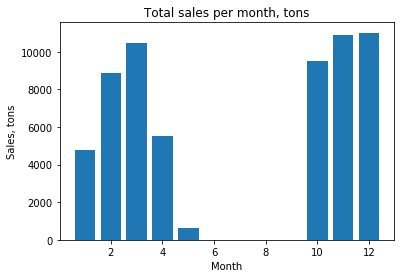

In [29]:
total_monthly_sales_graph()

In [12]:
avg_monthly_sales()

[(1, 208165.13),
 (2, 386278.96),
 (3, 456082.13),
 (4, 240974.87),
 (5, 38333.71),
 (10, 414338.35),
 (11, 454441.75),
 (12, 458965.33)]

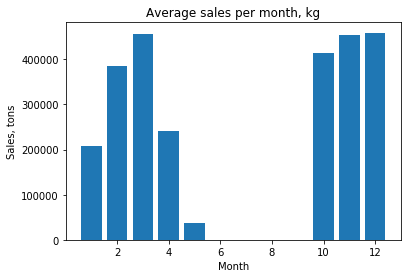

In [17]:
avg_monthly_sales_graph()

In [18]:
stdev_monthly_sales()

[(1, 68280.66142181386),
 (2, 122367.49363485537),
 (3, 120703.19992311158),
 (4, 136203.15618870803),
 (5, 38514.77994952787),
 (10, 231181.35801622685),
 (11, 160963.67291546718),
 (12, 137317.8025044054)]

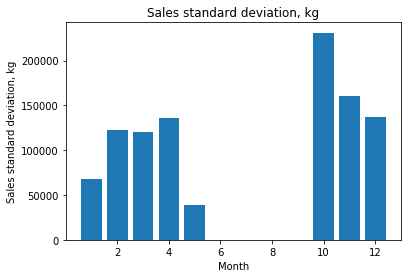

In [19]:
stdev_monthly_sales_graph()

In [22]:
variance_monthly_sales()

[(1, 4662248724.200378),
 (2, 14973803498.476372),
 (3, 14569262471.678642),
 (4, 18551299755.7656),
 (5, 1483388274.5605536),
 (10, 53444820294.22686),
 (11, 25909303998.4375),
 (12, 18856178884.63889)]